# Arabic Dialect Identification - Applying Machine Learning
## By Karim Elshetihy
- [Github](https://github.com/KarimElshetihy)
- [Linkedin](https://www.linkedin.com/in/karim-el-shetihy/)

#### Referances:
- [Arabic Dialict Identification in the Wild Paper](https://arxiv.org/pdf/2005.06557.pdf)
- [Flask Tutorial](https://programminghistorian.org/en/lessons/creating-apis-with-python-and-flask)
- [Multinomial Classification](https://towardsdatascience.com/the-complete-guide-to-neural-networks-multinomial-classification-4fe88bde7839)
- [Multi-class text classification model with Keras](https://www.design-ai.de/blog-posts/multi-class-text-classification-model-with-keras)
- [Word Embedding and Text Vectorization](https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/)


#### The Dataset:
The dataset and the dialect identification problem were addressed by Qatar Computing Research Institute, moreover, they published a paper, feel free to get more insights from it [Here](https://arxiv.org/pdf/2005.06557.pdf).

We are given a dataset which has 2 columns, **id** and **dialect**.
- Target label column is the **dialect***, which has 18 classes.
- The **id** column will be used to retrieve the text, to do that, you need to call this API by a
POST request. https://recruitment.aimtechnologies.co/ai-tasks.
- The request body must be a JSON as a list of strings, and the size of the list must NOT exceed 1000.
- The API will return a dictionary where the keys are the ids, and the values are the text, here is a request and response sample.

### Importing Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

# Data Preparing Tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report

# Machine Learning Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# To save the models
import pickle
import joblib

np.random.seed(1)
%matplotlib inline
sb.set_theme()

import warnings
warnings.simplefilter("ignore")

### Importing the Cleaned Dataset

In [38]:
clean_df = pd.read_csv("/content/drive/MyDrive/Colab/Arabic Dialect Classifier/clean_text.csv")
df = clean_df.copy()
df = df.sample(frac=1).reset_index(drop=True)

In [39]:
df.head()

,id,dialect,text
0,875655807819407360,DZ,اكيد اصير هيك اصلا مصورينو بتونس
1,513606860906061824,AE,وش حيلة شاف عينك بلد غابت عيونك يحس أنه غريب ف...
2,1176187287639605248,LB,اي طبعا السقعه بالليل صرلها فتره بلبنان اكتر ا...
3,1185510058500804608,YE,الترفيه والوناسه مالها دخل بالعادات واغلب الشع...
4,1153990462795112448,OM,مأجورة الأستاذة الدكتورة أنوس يلا خططي العالم ...


In [5]:
df.shape

(458197, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


### Applying TFIDF

In [7]:
tfidf = TfidfVectorizer(min_df=300, norm='l1', ngram_range=(1, 1))
features = tfidf.fit_transform(df['text']).toarray()
print('Features Shape: {}'.format(features.shape))

Features Shape: (458197, 2029)


### Encoding Columns

In [8]:
df['dialect_id'] = df['dialect'].factorize()[0]
targets = df['dialect_id']

dialect_to_id = dict(zip(df['dialect'].unique(), df['dialect_id'].unique()))
id_to_dialect = dict(zip(df['dialect_id'].unique(), df['dialect'].unique()))

In [10]:
# Printing some TFIDF Results &
# Applying chi-sequared test to the TFIDF features
N = 2

for dialect, dialect_id in sorted(dialect_to_id.items()):
    features_chi2 = chi2(features, targets == dialect_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    # bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

    print("# '{}':".format(dialect))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    # print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'AE':
  . Most correlated unigrams:
. الوصل
. مب
# 'BH':
  . Most correlated unigrams:
. عبدالعزيز
. البحرين
# 'DZ':
  . Most correlated unigrams:
. واش
. غازي
# 'EG':
  . Most correlated unigrams:
. فى
. ده
# 'IQ':
  . Most correlated unigrams:
. هيج
. هسه
# 'JO':
  . Most correlated unigrams:
. اشي
. بلال
# 'KW':
  . Most correlated unigrams:
. مو
. الكويت
# 'LB':
  . Most correlated unigrams:
. عم
. هيدا
# 'LY':
  . Most correlated unigrams:
. توا
. شن
# 'MA':
  . Most correlated unigrams:
. راه
. ديال
# 'OM':
  . Most correlated unigrams:
. تو
. عمان
# 'PL':
  . Most correlated unigrams:
. هادا
. اشي
# 'QA':
  . Most correlated unigrams:
. تميم
. قطر
# 'SA':
  . Most correlated unigrams:
. النصر
. الهلال
# 'SD':
  . Most correlated unigrams:
. دي
. دا
# 'SY':
  . Most correlated unigrams:
. عم
. مواليد
# 'TN':
  . Most correlated unigrams:
. برشا
. تونس
# 'YE':
  . Most correlated unigrams:
. اخبار
. اليمن


### Splitting the Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['dialect'], test_size = 0.1, random_state = 1)

### Applying Count Vectorizer

In [12]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

### Applying TFIDF Transformation

In [13]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

----

### Training the Naive Bayse Model

In [14]:
NB = MultinomialNB().fit(X_train_tfidf, y_train)

### Printing some Results

In [15]:
sample = "عايز اشوف السيدة ال كانت بتجادل باسم عودة وبتقوله الرز غالى انا ممكن اقدر اشترية بس ف مواطنيين ماتقدرش تشترى وقتها ب جنيه.و قنينه الزيت عباد كانت ب جنيه واللحمه كانت ب جنيه .ياترى عامله اية دلوقتى ف جنة السيسي ال الزيت ب  جنية واللحمة ب جنيه"
print(NB.predict(count_vect.transform([sample])))

['EG']


In [16]:
sample = "فيه اشي راح يصير من شان لبنان من الدول العربية مشان ينعدل وينزبط حالون لانّوا ما بينفع معّن الا هيك"
print(NB.predict(count_vect.transform([sample])))

['PL']


In [17]:
sample = "إبن عمك عراقي ، من زمن لابس نطاقي. والله أسويها ويشيبلها الرضيع"
print(NB.predict(count_vect.transform([sample])))

['KW']


### Training Report

In [18]:
NB_predictions = NB.predict(X_train_tfidf)

In [19]:
print(classification_report(y_train, NB_predictions))

              precision    recall  f1-score   support

          AE       0.86      0.33      0.48     23699
          BH       0.91      0.24      0.38     23674
          DZ       0.95      0.28      0.44     14632
          EG       0.41      0.99      0.58     51789
          IQ       0.97      0.20      0.33     13885
          JO       0.92      0.19      0.31     25048
          KW       0.38      0.91      0.53     37905
          LB       0.86      0.61      0.71     24873
          LY       0.75      0.73      0.74     32934
          MA       0.99      0.32      0.49     10377
          OM       0.99      0.10      0.19     17233
          PL       0.42      0.80      0.55     39391
          QA       0.69      0.60      0.64     27999
          SA       0.82      0.34      0.48     24073
          SD       1.00      0.13      0.23     12912
          SY       0.99      0.06      0.11     14671
          TN       0.99      0.06      0.11      8316
          YE       1.00    

### Testing Report

In [20]:
# Applying Count Vectorizer
NB_test_predictions = []
for text in X_test.values:
    X_test_counts = count_vect.transform([text])
    pred = NB.predict(X_test_counts)
    NB_test_predictions.append(pred)

In [21]:
print(classification_report(y_test, NB_test_predictions))

              precision    recall  f1-score   support

          AE       0.59      0.21      0.31      2597
          BH       0.59      0.12      0.20      2618
          DZ       0.83      0.27      0.41      1551
          EG       0.43      0.96      0.59      5847
          IQ       0.94      0.18      0.30      1612
          JO       0.64      0.09      0.16      2873
          KW       0.31      0.79      0.44      4204
          LB       0.73      0.55      0.63      2744
          LY       0.64      0.60      0.62      3565
          MA       0.97      0.36      0.52      1162
          OM       0.85      0.07      0.12      1883
          PL       0.34      0.68      0.45      4351
          QA       0.46      0.45      0.45      3070
          SA       0.53      0.19      0.29      2759
          SD       0.94      0.14      0.24      1522
          SY       0.92      0.06      0.11      1571
          TN       0.95      0.08      0.14       930
          YE       0.89    

---

## Support Vector Machines Classifier

### Training SVM Model

In [22]:
SVM = LinearSVC().fit(X_train_tfidf, y_train)

### Printing some Results

In [23]:
sample = "عايز اشوف السيدة ال كانت بتجادل باسم عودة وبتقوله الرز غالى انا ممكن اقدر اشترية بس ف مواطنيين ماتقدرش تشترى وقتها ب جنيه.و قنينه الزيت عباد كانت ب جنيه واللحمه كانت ب جنيه .ياترى عامله اية دلوقتى ف جنة السيسي ال الزيت ب  جنية واللحمة ب جنيه"
print(SVM.predict(count_vect.transform([sample])))

['EG']


In [24]:
sample = "فيه اشي راح يصير من شان لبنان من الدول العربية مشان ينعدل وينزبط حالون لانّوا ما بينفع معّن الا هيك"
print(SVM.predict(count_vect.transform([sample])))

['PL']


In [25]:
sample = "إبن عمك عراقي ، من زمن لابس نطاقي. والله أسويها ويشيبلها الرضيع"
print(SVM.predict(count_vect.transform([sample])))

['SD']


### Training Report

In [26]:
SVM_predictions = SVM.predict(X_train_tfidf)

In [27]:
print(classification_report(y_train, SVM_predictions))

              precision    recall  f1-score   support

          AE       0.90      0.90      0.90     23699
          BH       0.92      0.88      0.90     23674
          DZ       0.94      0.91      0.93     14632
          EG       0.92      0.98      0.95     51789
          IQ       0.95      0.94      0.95     13885
          JO       0.92      0.86      0.89     25048
          KW       0.90      0.95      0.92     37905
          LB       0.93      0.95      0.94     24873
          LY       0.95      0.95      0.95     32934
          MA       0.98      0.94      0.96     10377
          OM       0.92      0.89      0.91     17233
          PL       0.89      0.91      0.90     39391
          QA       0.92      0.92      0.92     27999
          SA       0.90      0.92      0.91     24073
          SD       0.97      0.94      0.95     12912
          SY       0.94      0.89      0.91     14671
          TN       0.97      0.91      0.94      8316
          YE       0.97    

### Testing Report

In [28]:
# Applying Count Vectorizer
SVM_test_predictions = []
for text in X_test.values:
    X_test_counts = count_vect.transform([text])
    pred = SVM.predict(X_test_counts)
    SVM_test_predictions.append(pred)

In [29]:
print(classification_report(y_test, SVM_test_predictions))

              precision    recall  f1-score   support

          AE       0.40      0.44      0.42      2597
          BH       0.43      0.31      0.36      2618
          DZ       0.55      0.55      0.55      1551
          EG       0.70      0.86      0.77      5847
          IQ       0.61      0.52      0.56      1612
          JO       0.41      0.37      0.39      2873
          KW       0.52      0.57      0.54      4204
          LB       0.60      0.69      0.64      2744
          LY       0.71      0.66      0.68      3565
          MA       0.69      0.62      0.65      1162
          OM       0.42      0.35      0.38      1883
          PL       0.52      0.51      0.52      4351
          QA       0.44      0.51      0.48      3070
          SA       0.41      0.44      0.42      2759
          SD       0.64      0.58      0.61      1522
          SY       0.45      0.35      0.40      1571
          TN       0.58      0.50      0.54       930
          YE       0.39    

---

### Logistic Regression Classifier

### Training the Logestic Regression Model

In [30]:
LR = LogisticRegression().fit(X_train_tfidf, y_train)

### Printing some Results

In [31]:
sample = "عايز اشوف السيدة ال كانت بتجادل باسم عودة وبتقوله الرز غالى انا ممكن اقدر اشترية بس ف مواطنيين ماتقدرش تشترى وقتها ب جنيه.و قنينه الزيت عباد كانت ب جنيه واللحمه كانت ب جنيه .ياترى عامله اية دلوقتى ف جنة السيسي ال الزيت ب  جنية واللحمة ب جنيه"
print(LR.predict(count_vect.transform([sample])))

['EG']


In [32]:
sample = "فيه اشي راح يصير من شان لبنان من الدول العربية مشان ينعدل وينزبط حالون لانّوا ما بينفع معّن الا هيك"
print(LR.predict(count_vect.transform([sample])))

['JO']


In [33]:
sample = "إبن عمك عراقي ، من زمن لابس نطاقي. والله أسويها ويشيبلها الرضيع"
print(LR.predict(count_vect.transform([sample])))

['IQ']


### Training Report

In [34]:
LR_predictions = LR.predict(X_train_tfidf)

In [35]:
print(classification_report(y_train, LR_predictions))

              precision    recall  f1-score   support

          AE       0.57      0.52      0.54     23699
          BH       0.57      0.44      0.50     23674
          DZ       0.74      0.52      0.61     14632
          EG       0.70      0.90      0.79     51789
          IQ       0.77      0.54      0.63     13885
          JO       0.60      0.42      0.50     25048
          KW       0.51      0.76      0.61     37905
          LB       0.71      0.72      0.71     24873
          LY       0.62      0.77      0.69     32934
          MA       0.85      0.57      0.68     10377
          OM       0.60      0.41      0.48     17233
          PL       0.53      0.68      0.59     39391
          QA       0.59      0.59      0.59     27999
          SA       0.50      0.56      0.53     24073
          SD       0.83      0.53      0.65     12912
          SY       0.69      0.35      0.46     14671
          TN       0.82      0.38      0.52      8316
          YE       0.74    

### Testing Report

In [36]:
# Applying Count Vectorizer
LR_test_predictions = []
for text in X_test.values:
    X_test_counts = count_vect.transform([text])
    pred = LR.predict(X_test_counts)
    LR_test_predictions.append(pred)

In [37]:
print(classification_report(y_test, LR_test_predictions))

              precision    recall  f1-score   support

          AE       0.36      0.40      0.38      2597
          BH       0.38      0.23      0.29      2618
          DZ       0.50      0.49      0.49      1551
          EG       0.66      0.82      0.73      5847
          IQ       0.56      0.46      0.51      1612
          JO       0.35      0.35      0.35      2873
          KW       0.49      0.50      0.49      4204
          LB       0.54      0.65      0.59      2744
          LY       0.60      0.58      0.59      3565
          MA       0.61      0.57      0.59      1162
          OM       0.35      0.28      0.31      1883
          PL       0.45      0.41      0.43      4351
          QA       0.41      0.46      0.43      3070
          SA       0.30      0.42      0.35      2759
          SD       0.57      0.55      0.56      1522
          SY       0.42      0.31      0.36      1571
          TN       0.55      0.36      0.43       930
          YE       0.39    

---

## Random Forests Classifier 

### Training the Random Forests Model

In [45]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=25, random_state=1).fit(X_train_tfidf, y_train)

### Printing some Results

In [46]:
sample = "عايز اشوف السيدة ال كانت بتجادل باسم عودة وبتقوله الرز غالى انا ممكن اقدر اشترية بس ف مواطنيين ماتقدرش تشترى وقتها ب جنيه.و قنينه الزيت عباد كانت ب جنيه واللحمه كانت ب جنيه .ياترى عامله اية دلوقتى ف جنة السيسي ال الزيت ب  جنية واللحمة ب جنيه"
print(RF.predict(count_vect.transform([sample])))

['EG']


In [47]:
sample = "فيه اشي راح يصير من شان لبنان من الدول العربية مشان ينعدل وينزبط حالون لانّوا ما بينفع معّن الا هيك"
print(RF.predict(count_vect.transform([sample])))

['PL']


In [48]:
sample = "إبن عمك عراقي ، من زمن لابس نطاقي. والله أسويها ويشيبلها الرضيع"
print(RF.predict(count_vect.transform([sample])))

['EG']


### Training Report

In [49]:
RF_predictions = RF.predict(X_train_tfidf)

In [50]:
print(classification_report(y_train, RF_predictions))

              precision    recall  f1-score   support

          AE       1.00      0.00      0.00     23699
          BH       1.00      0.00      0.00     23674
          DZ       0.99      0.02      0.04     14632
          EG       0.13      1.00      0.23     51789
          IQ       1.00      0.00      0.00     13885
          JO       1.00      0.00      0.01     25048
          KW       0.78      0.08      0.14     37905
          LB       0.94      0.06      0.12     24873
          LY       0.98      0.07      0.13     32934
          MA       1.00      0.01      0.02     10377
          OM       0.00      0.00      0.00     17233
          PL       0.69      0.06      0.10     39391
          QA       0.94      0.02      0.05     27999
          SA       0.00      0.00      0.00     24073
          SD       1.00      0.00      0.00     12912
          SY       1.00      0.01      0.03     14671
          TN       0.00      0.00      0.00      8316
          YE       0.00    

### Testing Report

In [55]:
# Applying Count Vectorizer
# RF_test_predictions = []
# for text in X_test.values:
#     X_test_counts = count_vect.transform([text])
#     pred = RF.predict(X_test_counts)
#     RF_test_predictions.append(pred)

In [56]:
# print(classification_report(y_test, RF_test_predictions))

---

### Saving the Models

#### TFIDF Features

In [57]:
# Saving TFIDF Transformer Features
pickle.dump(tfidf, open("/content/drive/MyDrive/Colab/Arabic Dialect Classifier/tfidf300.pickle", "wb"))
pickle.dump(X_train_tfidf, open("/content/drive/MyDrive/Colab/Arabic Dialect Classifier/train_features300.pickle", "wb"))

#### Machine Learning Models

In [58]:
# save the models
filename = '/content/drive/MyDrive/Colab/Arabic Dialect Classifier/SVM18_Model.sav'
joblib.dump(SVM, filename)

['/content/drive/MyDrive/Colab/Arabic Dialect Classifier/SVM18_Model.sav']

In [59]:
# save the model to disk
filename = '/content/drive/MyDrive/Colab/Arabic Dialect Classifier/NB18_Model.sav'
joblib.dump(NB, filename)

['/content/drive/MyDrive/Colab/Arabic Dialect Classifier/NB18_Model.sav']

In [60]:
# save the model to disk
filename = '/content/drive/MyDrive/Colab/Arabic Dialect Classifier/LR18_Model.sav'
joblib.dump(LR, filename)

['/content/drive/MyDrive/Colab/Arabic Dialect Classifier/LR18_Model.sav']

In [61]:
# save the model to disk
filename = '/content/drive/MyDrive/Colab/Arabic Dialect Classifier/RF18_Model.sav'
joblib.dump(RF, filename)

['/content/drive/MyDrive/Colab/Arabic Dialect Classifier/RF18_Model.sav']

### Viewing some Statistics

In [76]:
NB_CR = classification_report(y_test, NB_test_predictions, output_dict=True)
SVM_CR = classification_report(y_test, SVM_test_predictions, output_dict=True)
LR_CR = classification_report(y_test, LR_test_predictions, output_dict=True)

#### Naive Bayes Model

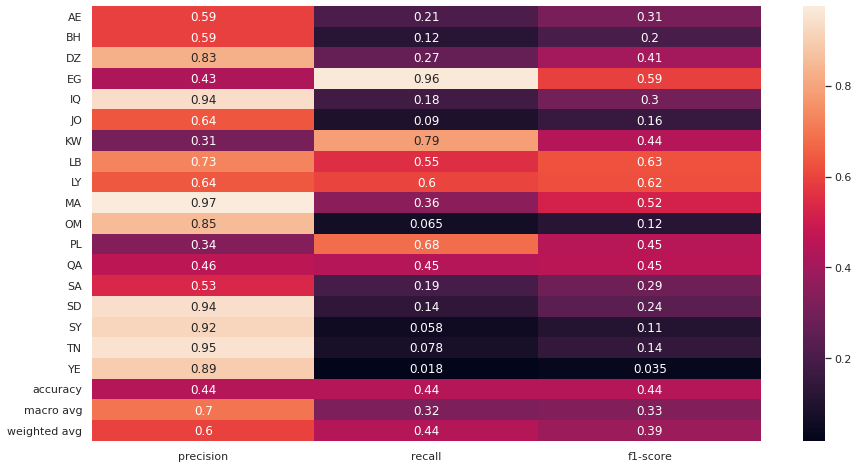

In [78]:
plt.figure(figsize=(15,8));
sb.heatmap(pd.DataFrame(NB_CR).iloc[:-1, :].T, annot=True);

#### Support Vector Machines Model

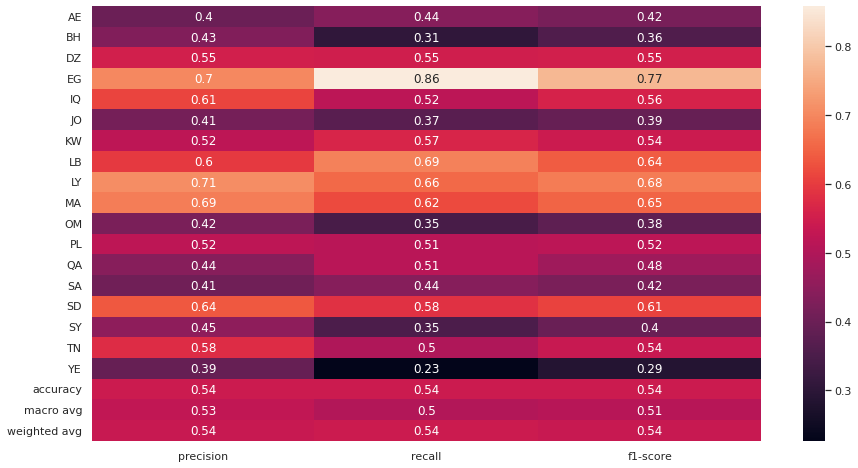

In [81]:
plt.figure(figsize=(15,8));
sb.heatmap(pd.DataFrame(SVM_CR).iloc[:-1, :].T, annot=True);

#### Logestic Regression Model

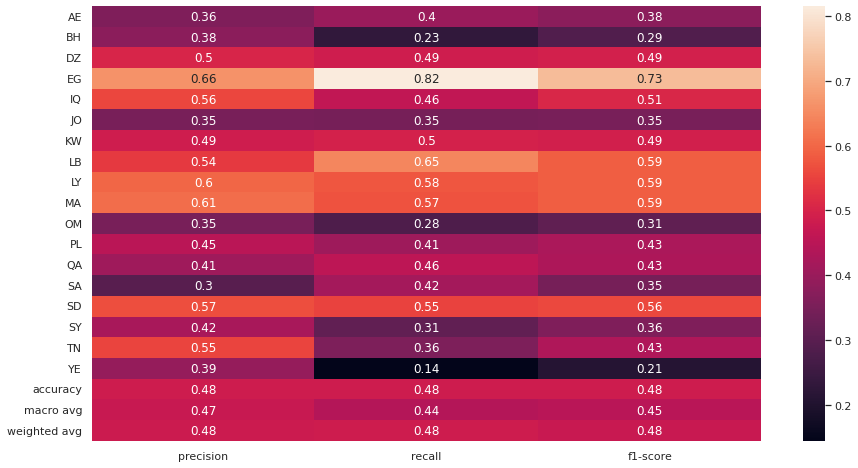

In [86]:
plt.figure(figsize=(15,8));
sb.heatmap(pd.DataFrame(LR_CR).iloc[:-1, :].T, annot=True);